# Daniil Khodosko

## Research question/interests

What is the most over valued stock? Which US stock are people paying more for then necessary? Which stock is trading above its actual value?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns #Understanding my variables
from IPython.display import display
import mplfinance as fplt




Loading in stocks of my choice for EDA:

In [2]:
AAPL_df = pd.read_csv("../data/raw/archive/Stocks/aapl.us.txt", sep=",", header=0)
MSFT_df = pd.read_csv("../data/raw/archive/Stocks/msft.us.txt", sep=",", header=0)
BA_df = pd.read_csv("../data/raw/archive/Stocks/ba.us.txt", sep=",", header=0)
LMT_df = pd.read_csv("../data/raw/archive/Stocks/lmt.us.txt", sep=",", header=0)




In [3]:
LMT_df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1977-01-03,0.7388,0.7466,0.7388,0.7466,26460,0
1,1977-01-04,0.7466,0.7545,0.7077,0.7466,29387,0
2,1977-01-05,0.7466,0.7702,0.7466,0.7702,31420,0
3,1977-01-06,0.7702,0.8098,0.7702,0.8098,56612,0
4,1977-01-07,0.8098,0.8175,0.8020,0.8175,48724,0
...,...,...,...,...,...,...,...
10299,2017-11-06,309.7200,311.9300,308.6800,310.0800,717284,0
10300,2017-11-07,310.0800,313.3700,310.0800,313.2900,874379,0
10301,2017-11-08,313.4400,315.7000,313.3000,315.6400,729698,0
10302,2017-11-09,314.8500,315.0600,310.2800,311.0800,889554,0


As I am exploring here I want to download a couple stocks I find interesting just to get a feel for the dataset. I will ultimatly load more and merge them but for now I am looking at these.

In [4]:
AAPL_df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0
...,...,...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241,0
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877,0
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166,0
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000,29533086,0


# TASK 1: **EDA**

Here we will explore my stock data, I will not just be exploring a single stock but I will also comnbine stock dataframes to compare them to each other to see which is more overpriced.
First let's look at the structure of the data. 

In [5]:
print(f"Apple shape: {AAPL_df.shape}")
print(f"BA shape: {BA_df.shape}")
print(f"MSFT shape: {MSFT_df.shape}")
print(f"LMT shape: {LMT_df.shape}")

Apple shape: (8364, 7)
BA shape: (12074, 7)
MSFT shape: (7983, 7)
LMT shape: (10304, 7)


Looking at this, some stocks have more rows. This is because some stocks have been around for longer, or whoever put this dataset together collected more data for certain stocks. I will deal with this later on, but I believe that I should truncate the data to start from the 2000s. 

Very early data on these stocks has less and less to do with them now so truncating the time frame will make a more current data analysis.

In [6]:
print("Apple:")
display(AAPL_df.head())

print("MSFT:")
display(MSFT_df.head())

print("LMT:")
display(LMT_df.head())



Apple:


,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


MSFT:


,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0


LMT:


,Date,Open,High,Low,Close,Volume,OpenInt
0,1977-01-03,0.7388,0.7466,0.7388,0.7466,26460,0
1,1977-01-04,0.7466,0.7545,0.7077,0.7466,29387,0
2,1977-01-05,0.7466,0.7702,0.7466,0.7702,31420,0
3,1977-01-06,0.7702,0.8098,0.7702,0.8098,56612,0
4,1977-01-07,0.8098,0.8175,0.8020,0.8175,48724,0


In [7]:
MSFT_df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0
...,...,...,...,...,...,...,...
7978,2017-11-06,84.20000,84.70000,84.08250,84.47000,19852151,0
7979,2017-11-07,84.77000,84.90000,83.93000,84.26000,17927878,0
7980,2017-11-08,84.14000,84.61000,83.83000,84.56000,18029584,0
7981,2017-11-09,84.11000,84.27000,82.90000,84.09000,21175384,0


Hmm... looks like OpenInt contains nothing useful for us, so we will just get rid of it.

**Discard OpenInt**

In [8]:
AAPL_df.columns
#AAPL_df = AAPL_df.drop("High",axis=0)
del AAPL_df["OpenInt"]
del MSFT_df["OpenInt"]

In [9]:
AAPL_df.head()


,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062


In [10]:
AAPL_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [11]:
AAPL_df['Open'] = pd.to_numeric(AAPL_df['Open'], errors='coerce')
AAPL_df['High'] = pd.to_numeric(AAPL_df['High'], errors='coerce')
AAPL_df['Low'] = pd.to_numeric(AAPL_df['Low'], errors='coerce')
AAPL_df['Close'] = pd.to_numeric(AAPL_df['Close'], errors='coerce')
AAPL_df['Volume'] = pd.to_numeric(AAPL_df['Volume'], errors='coerce')

print(AAPL_df.dtypes)


Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


In [12]:
AAPL_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,Open,High,Low,Close,Volume
count,8364.000000,8364.000000,8364.000000,8364.000000,8364.000000
mean,22.284350,22.495867,22.054244,22.281018,106641628.386059
std,37.763402,38.057733,37.447432,37.764469,99351865.219193
min,0.233050,0.235640,0.230510,0.230510,0.000000
25%,1.137100,1.164200,1.112800,1.137100,43843646.500000
50%,1.632800,1.663400,1.600600,1.628250,74813834.000000
75%,23.739000,23.930500,23.335750,23.694500,132053352.500000
max,175.110000,175.610000,174.270000,175.610000,2069769775.000000


Minimum Volume of 0 also does not seem right. Lets try to see where this value is located, maybe it is the first day of trading? We should get rid of this valuse to see a realistic range for volume.

In [13]:
AAPL_df.loc[AAPL_df['Volume'] == 0]

,Date,Open,High,Low,Close,Volume
6461,2010-04-26,34.829,34.892,34.345,34.514,0


Interesting... seems to be occuring in 2010 which is well after the first day of trading.

After looking at yahoo finance this value is very wrong, it should be 479,068,800. 

This means there was a mistake in data entry.

In [14]:
AAPL_df


,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062
...,...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000,29533086


# AAPL Stock is Wrong
After more googling I found that the AAPL dataset is very wrong, all the prices are wrong and the volume. The data for MSFT is correct but from now one we will discard the AAPL dataset. It is possible that this data did not take into account stock splits. 

I have referenced a lot of the other data which seems correct but the apple dataset is garbage.

In [15]:
MSFT_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

<AxesSubplot:>

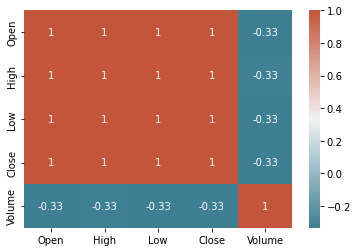

In [16]:
corr = MSFT_df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

If you look at the heatmap and the data itself you will see that a stocks open, close, and high price are all almost the same. 
The reason for this is because the stocks which I have chosen to display are what is called "blue chip" stocks, and they have a very low price volitility, meaning that throughout the day the price does not change much. 

<AxesSubplot:xlabel='Open', ylabel='High'>

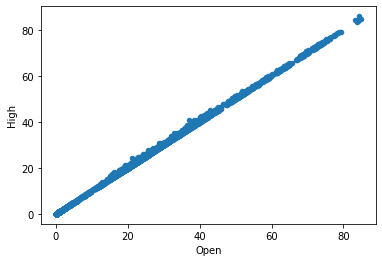

In [17]:
MSFT_df.plot(kind='scatter', x='Open', y='High')


So this might not add much value but it is we can see that the open price and high price are strongly correlated as previously shown by the heatmap.

Lets look for null values in the MSFT dataset

In [18]:
MSFT_df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Lets drop them:

In [19]:
MSFT_df.dropna(inplace = True, axis = 0)
LMT_df.dropna(inplace = True, axis = 0)



Remebering previously that the Date on all these stocks is type object, lets change that as we will now get into plotting with the date and it will be helpful to change to datetime.

In [20]:
MSFT_df['Date'] = pd.to_datetime(MSFT_df['Date'])
LMT_df['Date'] = pd.to_datetime(LMT_df['Date'])



Previously we looked at how many rows but now that we converted our date we can see how many days of data we have. 

In [21]:
maxDate = MSFT_df['Date'].max()  
minDate = MSFT_df['Date'].min()
date = maxDate - minDate
print(date)

11565 days 00:00:00


In [22]:
MSFT_df.iloc[-90:].describe().astype(int)


,Open,High,Low,Close,Volume
count,90,90,90,90,90
mean,75,75,74,75,20384262
std,3,3,3,3,8246919
min,68,69,68,69,10879680
25%,72,73,72,72,15718577
50%,73,74,73,73,18534607
75%,76,76,76,76,22279485
max,84,86,84,84,71024821


Nice, this MSFT data looks much better than the AAPL data. 

So the highest open is 84 dollars, and max volume is 71024821

Let us start plotting:

In [23]:
MSFT_df.index = MSFT_df["Date"]
LMT_df.index = LMT_df["Date"]




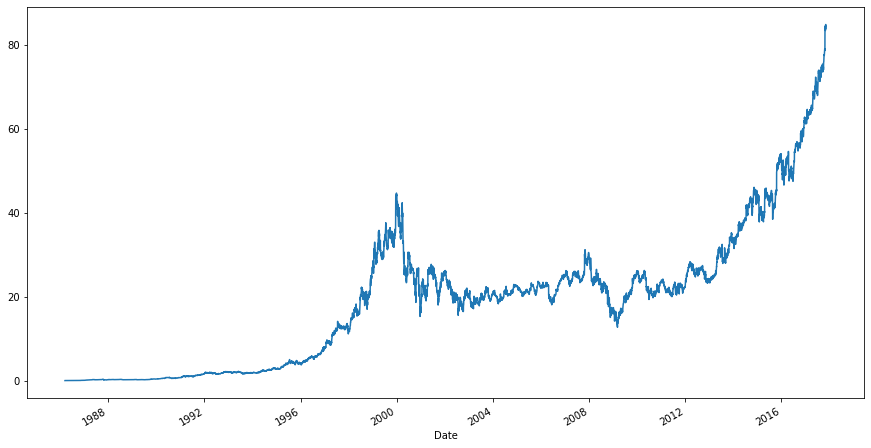

In [24]:
MSFT_df['Open'].plot(figsize = (15,8))
plt.show()

Looking at this plot is looks like there was a **BOOM** around the 2000s

Must be the Dotcom bubble. I wonder if people were vacationing a lot then because everyone was making a lot of money in tech. 

This might be a weird analysis but I want to compare how well MSFT was doing with CCL (Carnival Cruise Line) the cruise ships. Maybe people were going on a lot of cruises?

In [25]:
CCL_df = pd.read_csv("../data/raw/archive/Stocks/ccl.us.txt", sep=",", header=0)


In [26]:
CCL_df['Date'] = pd.to_datetime(CCL_df['Date'])
CCL_df.index = CCL_df["Date"]



In [27]:
del CCL_df["OpenInt"]
del LMT_df["OpenInt"]


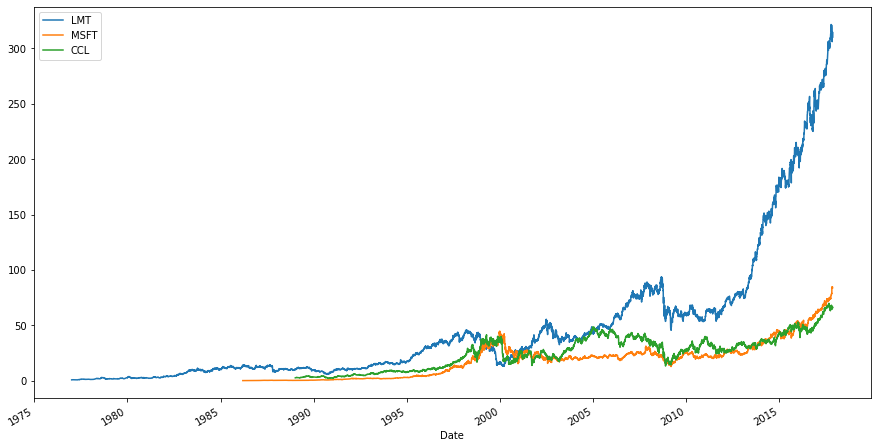

In [28]:
LMT_df['Open'].plot(label="LMT", figsize = (15,8))
MSFT_df['Open'].plot(label="MSFT")
CCL_df['Open'].plot(label="CCL")
plt.legend(loc='best')


Interesting... it looks like CCL (carnival cruise line) closely follows microsoft and the dotcom bubble. Which seems to make sense becuase as we were at the hight of the bubble money was flowing and people were spending more money. This could be an explination although I am not sure.

Also interesting is that LMT took a dip right at the dotcom bubble peak, I wonder why? 

Let's zoom in

(9131.0, 11596.0, 0.0, 50.0)

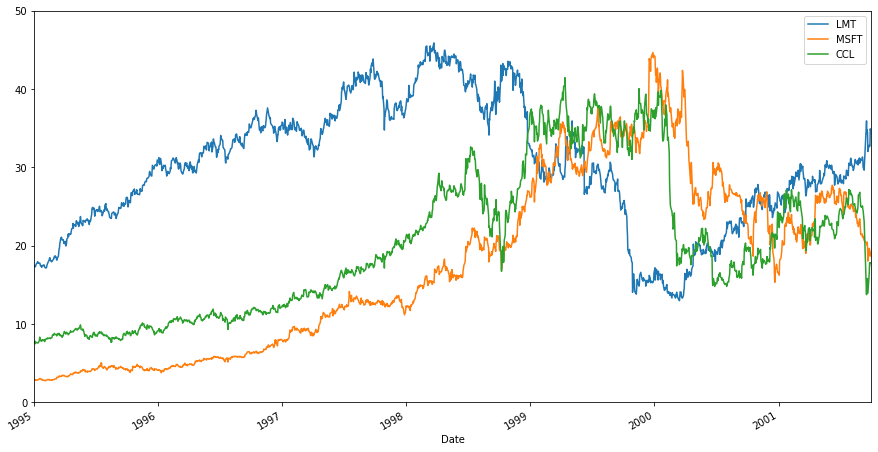

In [29]:
LMT_df['Open'].plot(label="LMT", figsize = (15,8))
MSFT_df['Open'].plot(label="MSFT")
CCL_df['Open'].plot(label="CCL")
plt.legend(loc='best')
plt.axis(['1995-01-01', '2001-10-01', 0, 50])


Let's continue exploring MSFT:

Let's look at the moving average of MSFT during the dotcom bubble and compare it with LMT

According to Christian Wollscheid, the pre-bubble was 1995 - 1997. The dotcom bubble was 1998 to March 2000. The burst went from March 2000 to October 2002. 

**Source:** Christian Wollscheid (Author), 2012, Rise and Burst of the Dotcom Bubble, Munich, GRIN Verlag, [https://www.grin.com/document/197166](https://www.grin.com/document/197166)

So that is the timeframe we will look at:

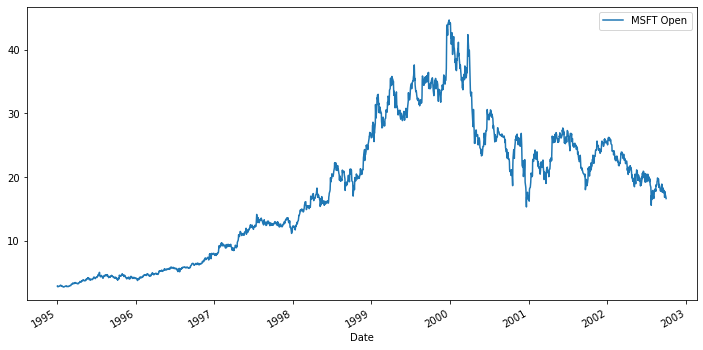

In [30]:
plt.figure(figsize=(12,6))
MSFT_df['Open'].loc['1995-01-01':'2002-10-01'].plot(label='MSFT Open')
plt.legend()

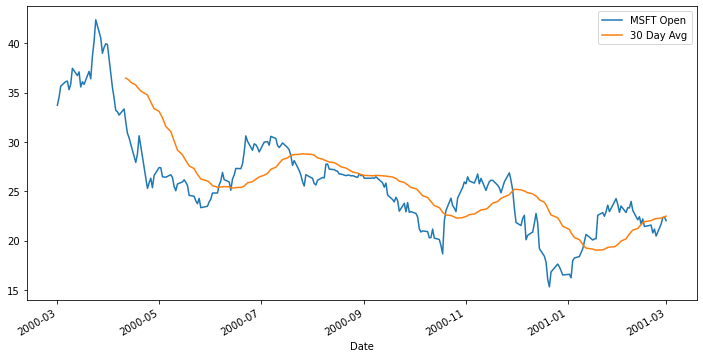

In [31]:
plt.figure(figsize=(12,6))
MSFT_df['Open'].loc['2000-03-01':'2001-03-01'].plot(label='MSFT Open')
MSFT_df['Open'].loc['2000-03-01':'2001-03-01'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

Let's compare that moving average to LMT which did well in that period:

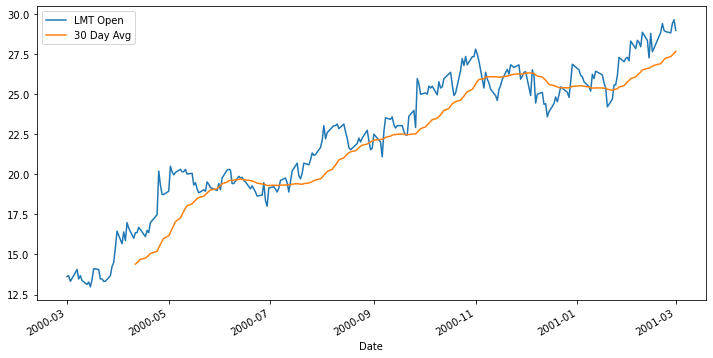

In [32]:
plt.figure(figsize=(12,6))
LMT_df['Open'].loc['2000-03-01':'2001-03-01'].plot(label='LMT Open')
LMT_df['Open'].loc['2000-03-01':'2001-03-01'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

In this data set there is and Open, Close, and High price. Stocks are sometimes easier to visualize with candles when you have these three pieces of information.

Also let's add the volume data to see how many trades were occuring for each day.

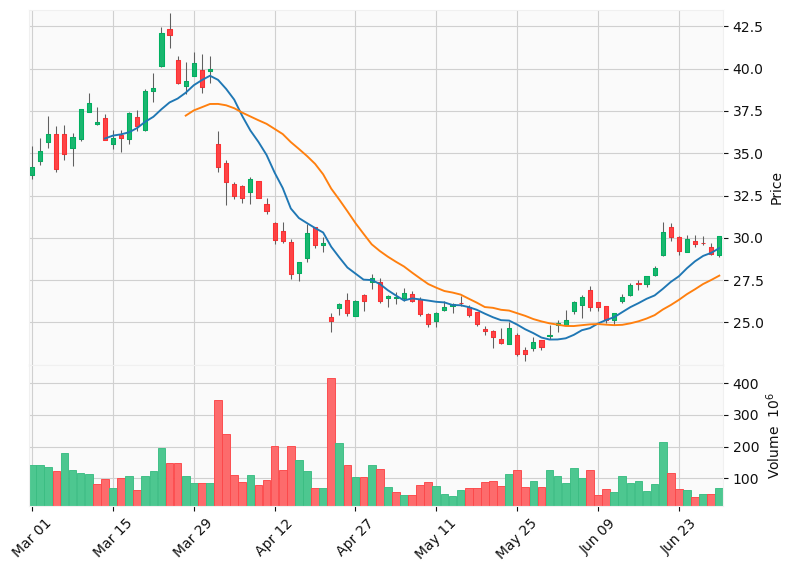

In [33]:
fplt.plot(MSFT_df['2000-03-01':'2000-07-01'], type="candle", volume=True, tight_layout=True, mav=(10,20), style="yahoo")

Let's look at the daily return of MSFT. We will be able to see the days where the percent change in the price was the highest.

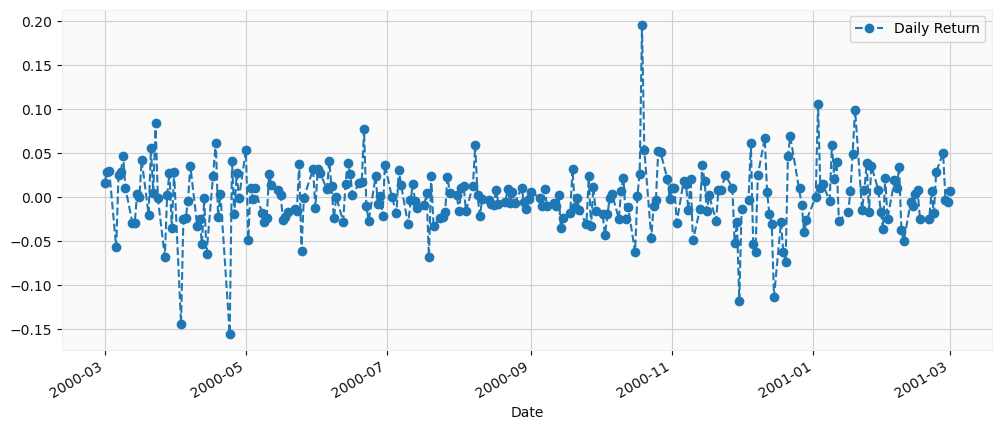

In [34]:
MSFT_df['Daily Return'] = MSFT_df['Close'].pct_change()
MSFT_df['Daily Return'].loc['2000-03-01':'2001-03-01'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()


In [35]:
MSFT_df

,Date,Open,High,Low,Close,Volume,Daily Return
Date,,,,,,,
1986-03-13,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,NaN
1986-03-14,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,0.000000
1986-03-17,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,0.000000
1986-03-18,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,0.000000
1986-03-19,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,0.000000
...,...,...,...,...,...,...,...
2017-11-06,2017-11-06,84.20000,84.70000,84.08250,84.47000,19852151,0.003922
2017-11-07,2017-11-07,84.77000,84.90000,83.93000,84.26000,17927878,-0.002486
2017-11-08,2017-11-08,84.14000,84.61000,83.83000,84.56000,18029584,0.003560


In [36]:
LMT_df['Daily Return'] = LMT_df['Close'].pct_change()


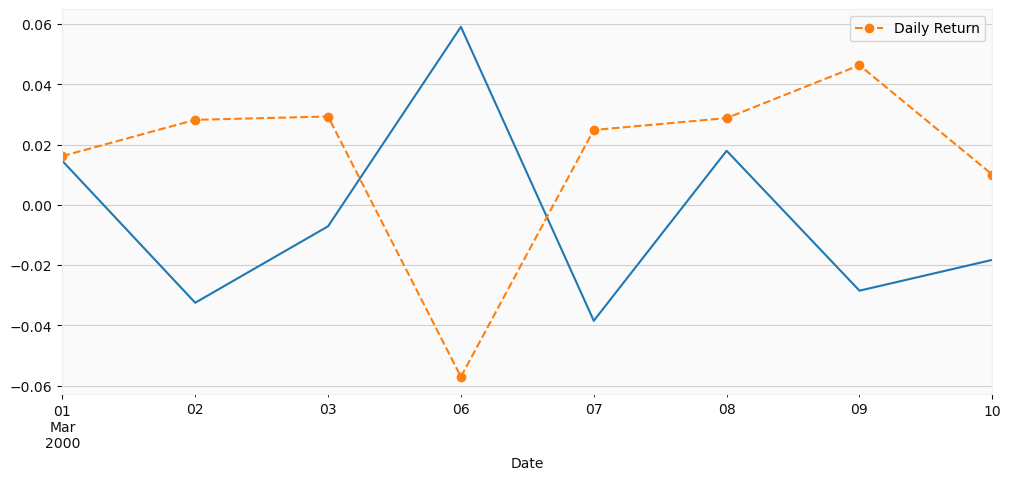

In [37]:
plt.figure(figsize=(12,6))
LMT_df['Daily Return'].loc['2000-03-01':'2000-03-10'].plot(label='MSFT Open')
MSFT_df['Daily Return'].loc['2000-03-01':'2000-03-10'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

# TASK 2 Analysis Pipeline: 

## 1. Load Data:

In [38]:
#Loading data, that is seprated by commas. header=0 uses the first row as headers. 
TSLA_df = pd.read_csv("../data/raw/archive/Stocks/tsla.us.txt", sep=",", header=0)



## 2. Clean Data:

In [39]:
#Deleting the OpneInt column because it has garbage data
del TSLA_df["OpenInt"]

#Dropping all the na values
TSLA_df.dropna(inplace = True, axis = 0)

#Changing the Date which was of type object to datetime
TSLA_df['Date'] = pd.to_datetime(TSLA_df['Date'])

#Setting the index of the dataframe to be 'Date'
TSLA_df.index = TSLA_df["Date"]

#Find data in the range of the dotcom bubble
TSLA_df = TSLA_df.loc['1995-01-01':'2002-10-01']


## 3. Process Data:

In [40]:
#Adding a column for daily returns
TSLA_df['Daily Return'] = TSLA_df['Close'].pct_change()

TSLA_df

,Date,Open,High,Low,Close,Volume,Daily Return
Date,,,,,,,


## 4. Wrangle Data
There is no wrangling that needs to be done here.

# Task 3 Method Chains

Notebook function:

In [41]:
def load_and_process(url_or_path_to_csv_file):
	ddf = (pd.read_csv(url_or_path_to_csv_file, sep=",", header=0)
	.assign(
		DailyReturn = lambda x: x['Close'].pct_change(),
		VolumeChange = lambda x: x['Volume'].pct_change()
	)
	.drop('OpenInt', 
	axis=1))
	
	
	ddf.dropna(inplace = True, axis = 0)
	ddf['Date'] = pd.to_datetime(ddf['Date'])
	ddf.index = ddf["Date"]
	ddf = ddf.loc['1995-01-01':'2002-10-01']

	return ddf

In [42]:
BAC_df = load_and_process("../data/raw/archive/Stocks/bac.us.txt")
BAC_df

,Date,Open,High,Low,Close,Volume,DailyReturn,VolumeChange
Date,,,,,,,,
1995-01-03,1995-01-03,8.1267,8.2681,8.1267,8.2400,1607614,0.013942,-0.304388
1995-01-04,1995-01-04,8.2209,8.3342,8.2209,8.3153,1630102,0.009138,0.013988
1995-01-05,1995-01-05,8.3342,8.4000,8.3153,8.3810,1318253,0.007901,-0.191306
1995-01-06,1995-01-06,8.3623,8.4284,8.3153,8.3623,1825696,-0.002231,0.384936
1995-01-09,1995-01-09,8.3342,8.3810,8.3153,8.3623,1158298,0.000000,-0.365558
...,...,...,...,...,...,...,...,...
2002-09-25,2002-09-25,29.1870,29.7440,28.4990,29.3780,14649917,0.024052,-0.113142
2002-09-26,2002-09-26,29.8380,30.5930,29.6130,30.4970,14516480,0.038090,-0.009108
2002-09-27,2002-09-27,30.3100,30.8750,29.4990,29.6510,14977467,-0.027740,0.031756


Testing the project functions load and process function:

In [43]:
import project_functions1

In [44]:
df = project_functions1.load_and_process("../data/raw/archive/Stocks/aa.us.txt")
df

,Date,Open,High,Low,Close,Volume,DailyReturn,VolumeChange
Date,,,,,,,,
1995-01-03,1995-01-03,20.481,20.481,20.024,20.211,1342579,-0.013183,-0.362794
1995-01-04,1995-01-04,20.274,20.379,20.087,20.274,2046440,0.003117,0.524260
1995-01-05,1995-01-05,20.211,20.274,20.128,20.128,1813094,-0.007201,-0.114025
1995-01-06,1995-01-06,20.128,20.733,20.128,20.713,3730793,0.029064,1.057694
1995-01-09,1995-01-09,20.566,20.983,20.566,20.920,2948388,0.009994,-0.209715
...,...,...,...,...,...,...,...,...
2002-09-25,2002-09-25,41.133,42.719,40.837,41.713,2553020,0.020951,-0.263366
2002-09-26,2002-09-26,41.755,42.075,40.739,41.755,2560922,0.001007,0.003095
2002-09-27,2002-09-27,41.736,41.736,39.860,40.295,1856201,-0.034966,-0.275183


# Task 4. Data Analysis:

After conducting the EDA my research question and interests have changed.

New research questions: 
- Which tech stocks were the most affected by the dotcom bubble bursting?
- Which tech stocks had the greatest negative returns during the dotcom bubble burst?
- How did non-tech stocks perform during the bubble and bubble burst?
- Which stocks went up in value during the dotcom bubble burst and had the greatest daily returns?
- What is the correlation between Open, High, Low, and Close prices?
- How does volume of stock effect the price change?

## Background: 

The dotcom bubble was a time when speculation on stocks was at an all-time high as investors were excited for the future. Unfortunately, this caused bad investment decisions because comapnies were overvalued. When the true value of the stocks were discovered the entire tech sector took a large dip (Christian Wollscheid, 2002).

According to Christian Wollscheid, the pre-bubble was 1995 - 1997. The dotcom bubble was 1998 to March 2000. The burst went from March 2000 to October 2002. 

**Source:** Christian Wollscheid (Author), 2012, Rise and Burst of the Dotcom Bubble, Munich, GRIN Verlag, [https://www.grin.com/document/197166](https://www.grin.com/document/197166)

So that is the time frame we will look at.

The functions module already truncates the data for this time period.


First we will load in some popular tech stocks that have been through the dotcom bubble:

In [45]:
# Loading and processing: 
# tech stocks
AMZN_df = project_functions1.load_and_process("../data/raw/archive/Stocks/amzn.us.txt")
MSFT_df = project_functions1.load_and_process("../data/raw/archive/Stocks/msft.us.txt")
CSCO_df = project_functions1.load_and_process("../data/raw/archive/Stocks/csco.us.txt")

# Bank stocks
JPM_df = project_functions1.load_and_process("../data/raw/archive/Stocks/jpm.us.txt")
BAC_df = project_functions1.load_and_process("../data/raw/archive/Stocks/bac.us.txt")
BCS_df = project_functions1.load_and_process("../data/raw/archive/Stocks/bcs.us.txt")
WFC_df = project_functions1.load_and_process("../data/raw/archive/Stocks/wfc.us.txt")

# Other Stocks
LMT_df = project_functions1.load_and_process("../data/raw/archive/Stocks/lmt.us.txt")
BA_df = project_functions1.load_and_process("../data/raw/archive/Stocks/ba.us.txt")


Let's look at the tech stocks all on one chart first:

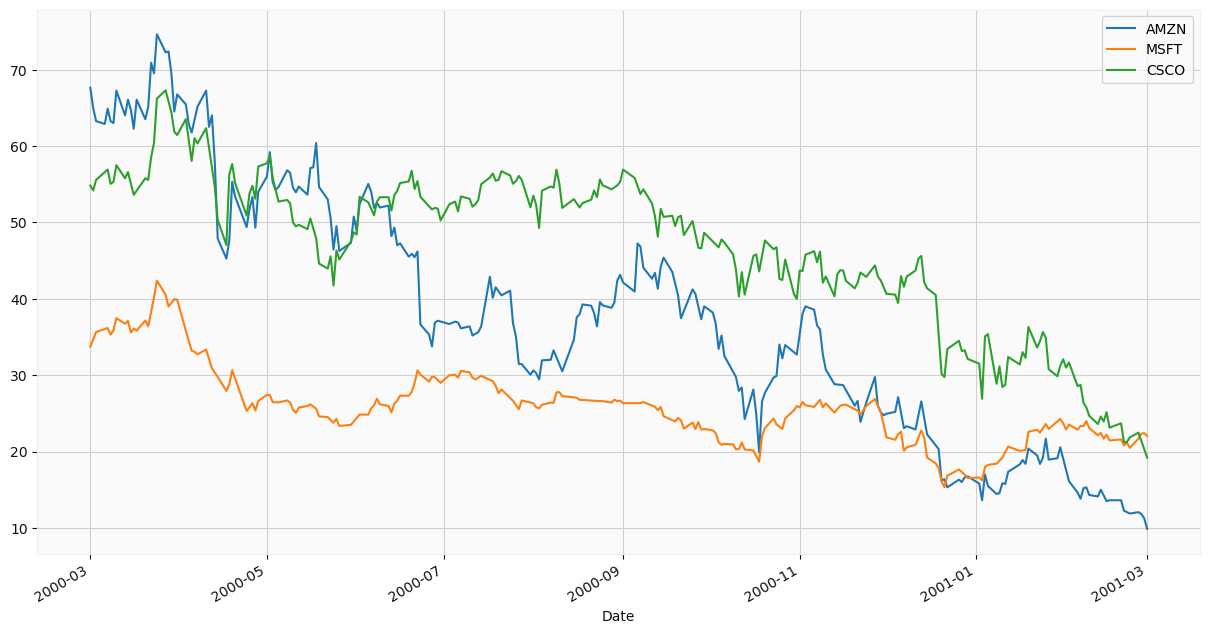

In [46]:
AMZN_df['Open'].loc['2000-03-01':'2001-03-01'].plot(label="AMZN", figsize = (15,8))
MSFT_df['Open'].loc['2000-03-01':'2001-03-01'].plot(label="MSFT")
CSCO_df['Open'].loc['2000-03-01':'2001-03-01'].plot(label="CSCO")

plt.legend(loc='best')

We can see a steady downward trend but we should look at all three individually to get a better feel for the performance.

Inorder to get more context becuase the stock dataset contains an open, high, and low price we can use a candle chart to show this information.

As an aditional context we will also plot the 10 day moving average which averages the prices every 10 days to show a smoother line representing the trend of the stocks.

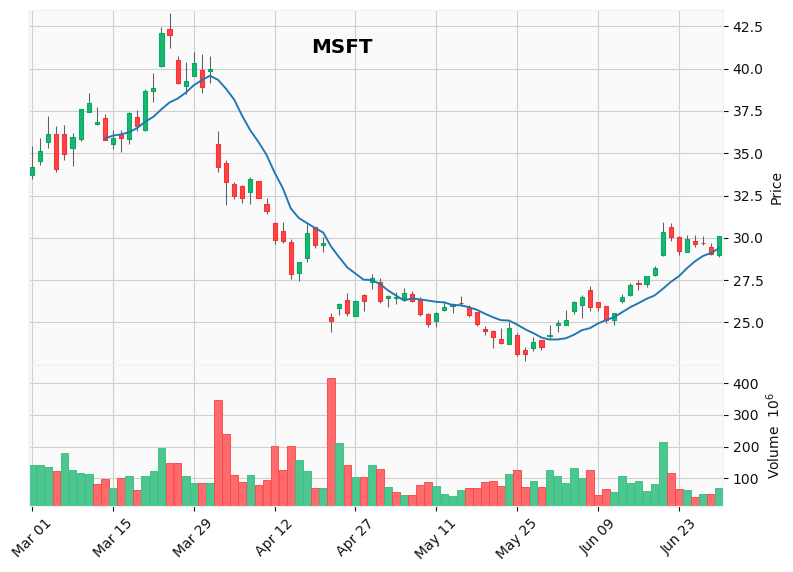

None

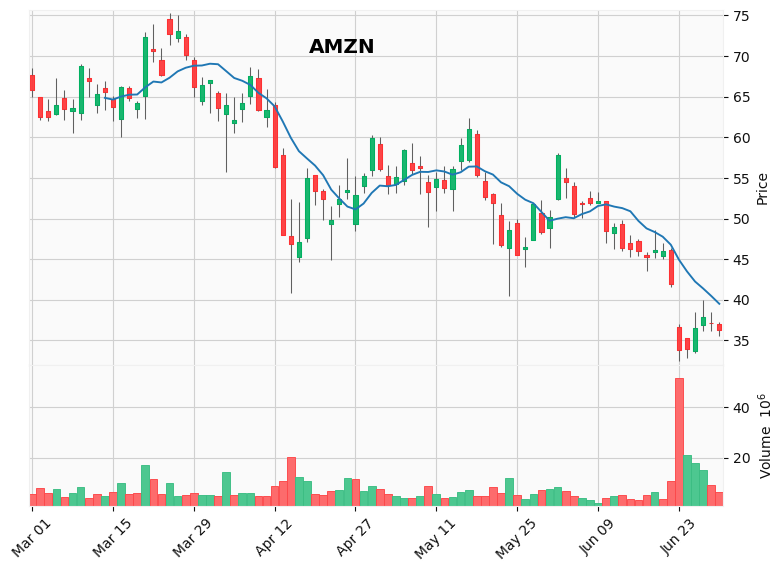

None

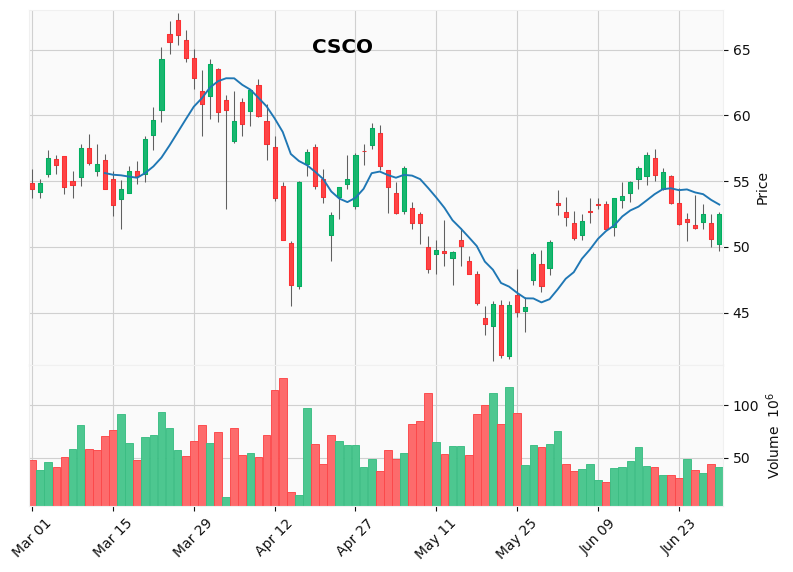

None

In [47]:
display(fplt.plot(MSFT_df['2000-03-01':'2000-07-01'], type="candle", volume=True, tight_layout=True, mav=(10), style="yahoo", title="MSFT"))
display(fplt.plot(AMZN_df['2000-03-01':'2000-07-01'], type="candle", volume=True, tight_layout=True, mav=(10), style="yahoo", title="AMZN"))
display(fplt.plot(CSCO_df['2000-03-01':'2000-07-01'], type="candle", volume=True, tight_layout=True, mav=(10), style="yahoo", title="CSCO"))

As seen in the data there was a clear downward trend for all these stocks during the bursting of the bubble. 

Lets see how bad some of those days actually were by seeing the daily returns:

<AxesSubplot:xlabel='Date'>

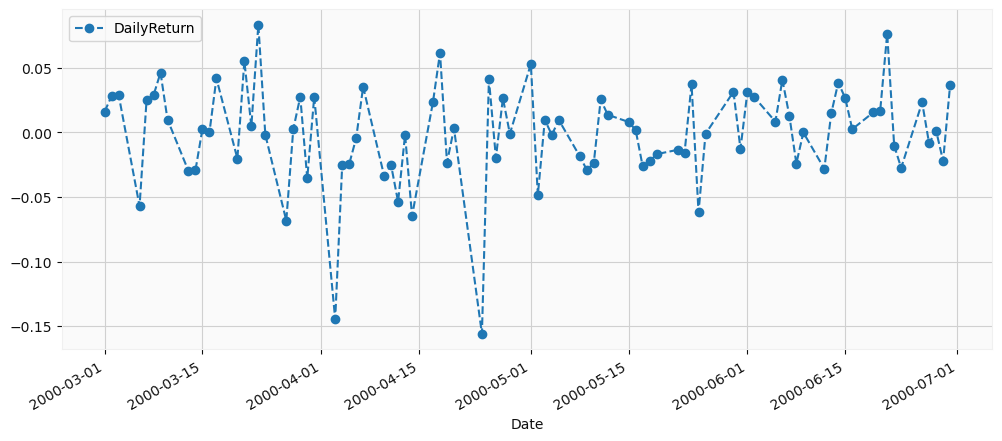

In [48]:
display(MSFT_df['DailyReturn'].loc['2000-03-01':'2000-07-01'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o'))


One of the worst days for MSFT was between April and May with a percent change of just over -15%

In the stock market that is a really bad day.

<AxesSubplot:xlabel='Date'>

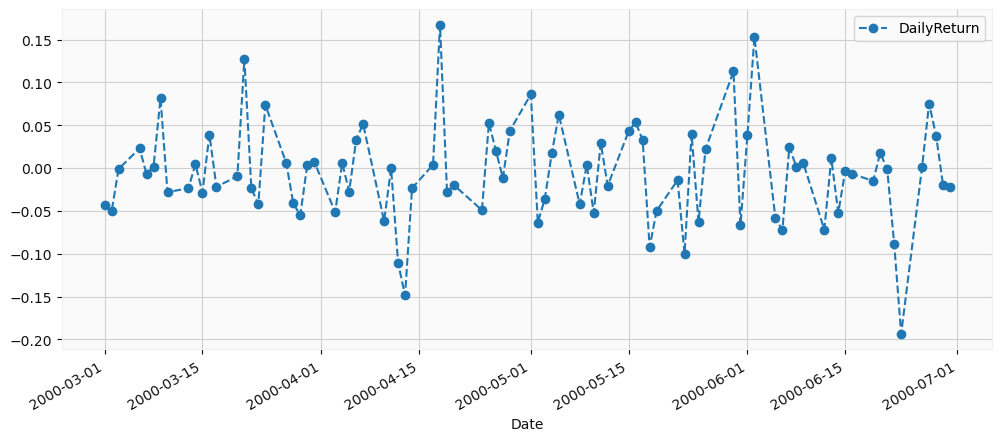

In [49]:
display(AMZN_df['DailyReturn'].loc['2000-03-01':'2000-07-01'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o'))


AMZN had its worst day a little further down the line in June with a percent change of almost -20%, even worse than MSFT!

<AxesSubplot:xlabel='Date'>

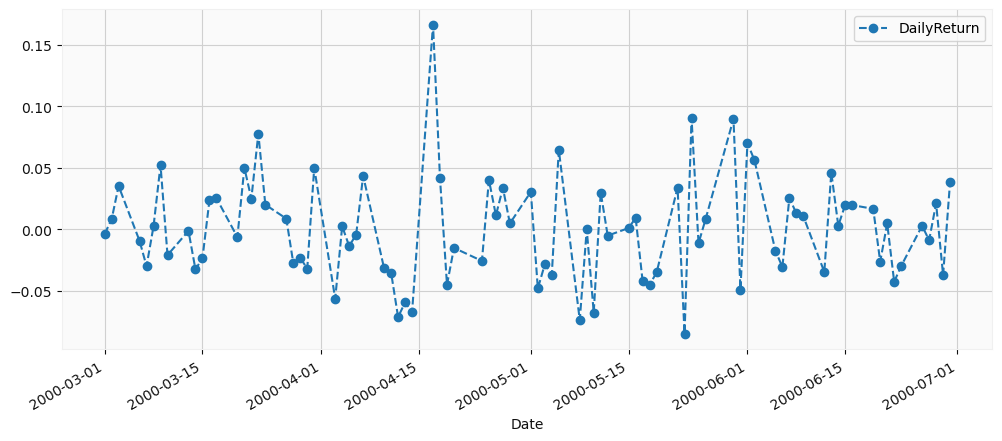

In [50]:
display(CSCO_df['DailyReturn'].loc['2000-03-01':'2000-07-01'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o'))

Relative to the other stocks CSCO had it easy with the worst day being in may with a change of about -8%

It seems like AMZN had some of the worst days during the DOTCOM bubble bursting than the other stocks. 

We can observe the daily returns in a different (some say better) way using histograms:

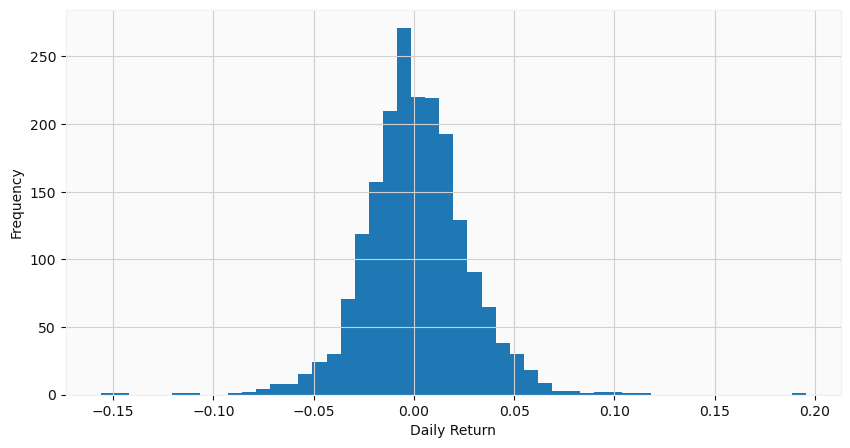

In [58]:
MSFT_df["DailyReturn"].hist(bins = 50, figsize = (10,5)) 
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

Interesting! We can see that the daily returns seems to follow a normal distribution for MSFT. We can see that most of the time the daily returns for MSFT is between -5% and 5% of the

Let's now look how this changed during the burst of the bubble:

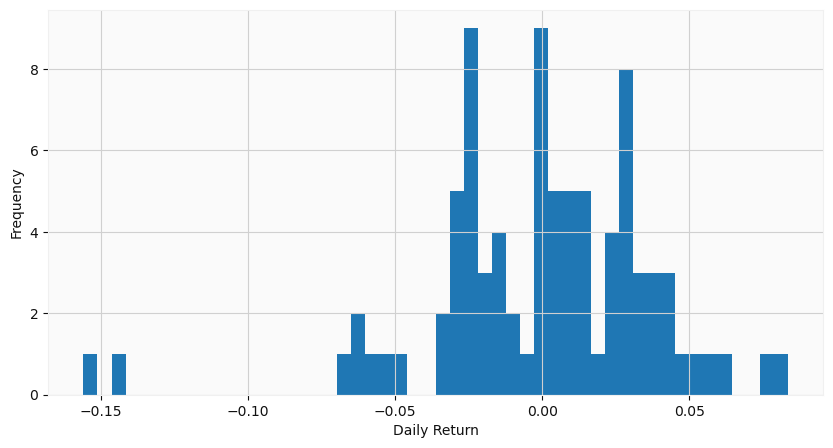

In [60]:
MSFT_df["DailyReturn"].loc['2000-03-01':'2000-07-01'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

This makes sense, as times got volitile and the market was in a crazy state, the returns did not follow a normal distribution because there were many really bad days.

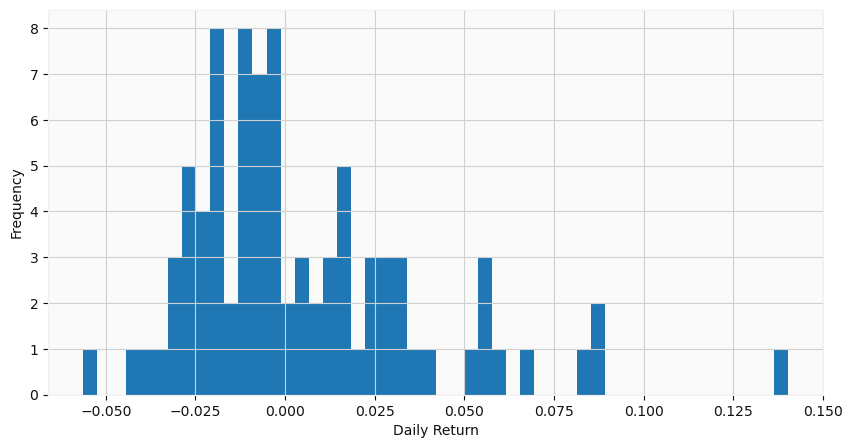

In [61]:
LMT_df["DailyReturn"].loc['2000-03-01':'2000-07-01'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

Contrasting with LMT we see how LMT was skewed toward positive daily returns during the bursting of the bubble.

Let's look at how LMT and BA performed during the tech bubble bursting:

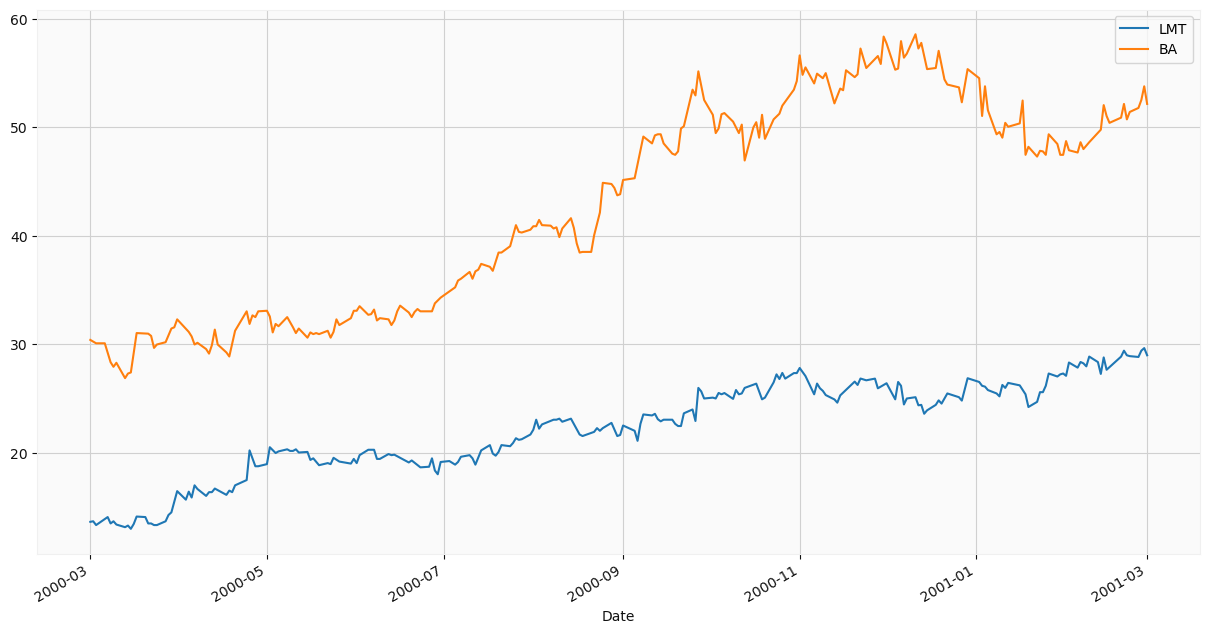

In [51]:
LMT_df['Open'].loc['2000-03-01':'2001-03-01'].plot(label="LMT", figsize = (15,8))
BA_df['Open'].loc['2000-03-01':'2001-03-01'].plot(label="BA")
plt.legend(loc='best')


Interesting! The tech crash seems to have not affected these stocks as much. This makes sense as the dotcom bubble was more centered around overvalued "useless" tech stocks. Therefore, and airline like BA should not be affected as well as the plane manufacturer Boeing.

Let's take a deeper dive with a candle chart and moving average showing the overall trend:

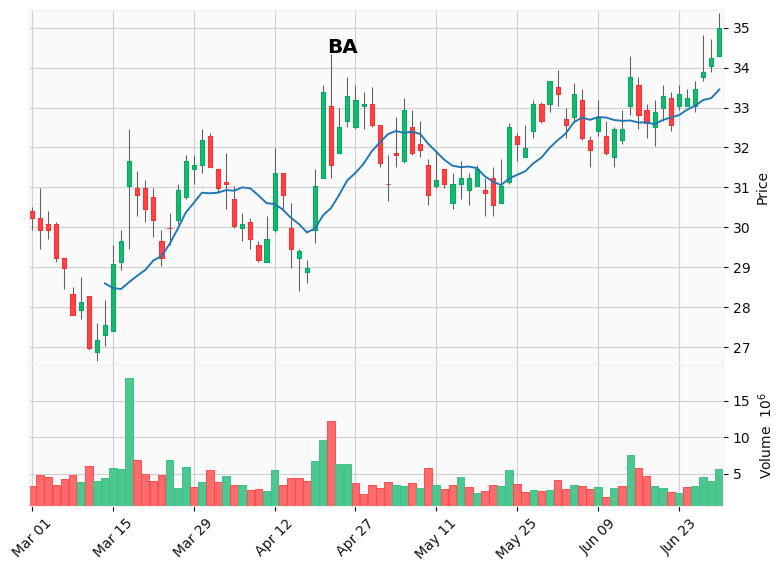

None

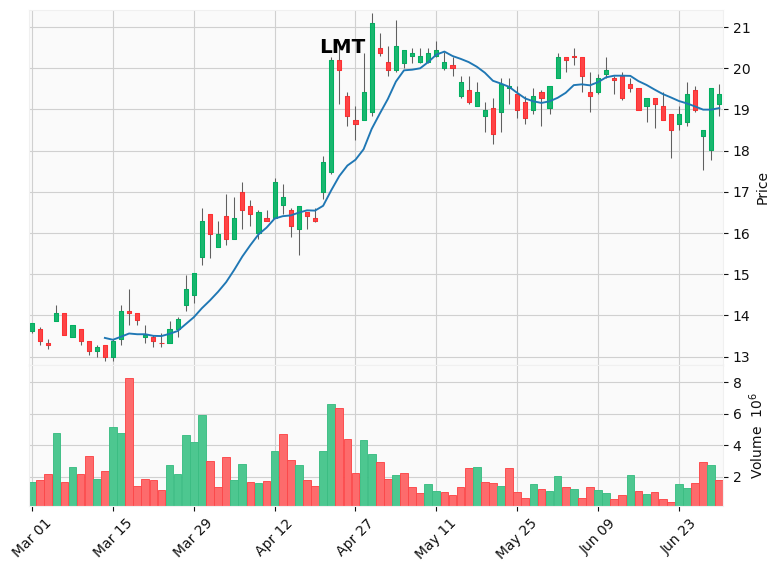

None

In [52]:
display(fplt.plot(BA_df['2000-03-01':'2000-07-01'], type="candle", volume=True, tight_layout=True, mav=(10), style="yahoo", title="BA"))
display(fplt.plot(LMT_df['2000-03-01':'2000-07-01'], type="candle", volume=True, tight_layout=True, mav=(10), style="yahoo", title="LMT"))

Here we can see that Boeing was on a steady climb while LMT had a more agressive climb during the dotcom bubble.

Let's have a look at the daily returns for this period of LMT and MSFT

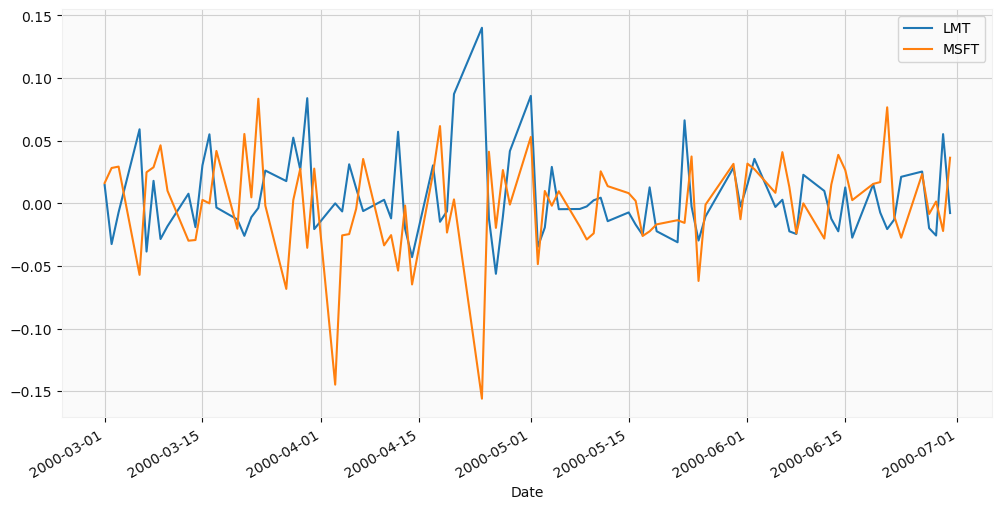

In [53]:
plt.figure(figsize=(12,6))
LMT_df['DailyReturn'].loc['2000-03-01':'2000-07-01'].plot(label='LMT')
MSFT_df['DailyReturn'].loc['2000-03-01':'2000-07-01'].plot(label='MSFT')
plt.legend(loc='best')

plt.show()

Interesting to see how the returns contrast each other in the month of April with MSFT losing 15% and LMT gaining 15%

On to the final question, we have seen how Open, High, low, and close price helped create a valuble stock chart with candles, but what is the correlation of these variables?

<AxesSubplot:>

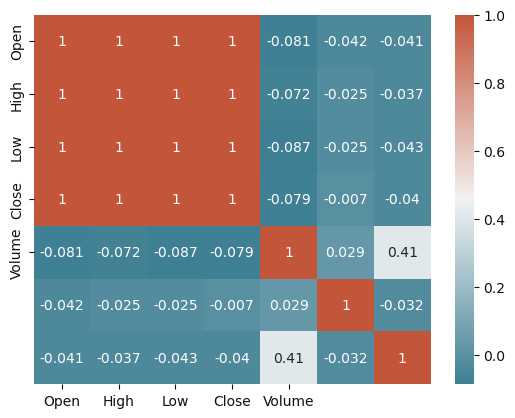

In [54]:
display(sns.heatmap(MSFT_df.corr(), xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)))


<AxesSubplot:>

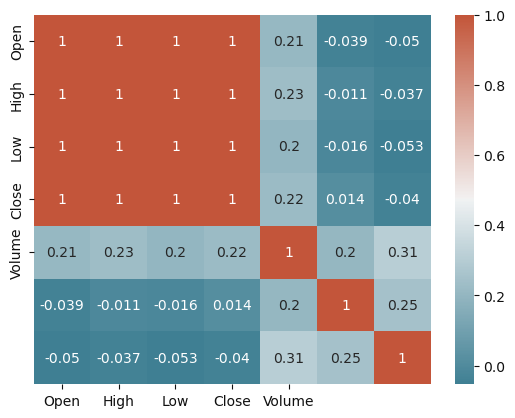

In [55]:
display(sns.heatmap(AMZN_df.corr(), xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)))

It seems like for these stocks the correlation between Open, High, Low, and Close is very high. This is becuase these stocks typically don't have a large amount of volitility so there is very little difference between the Open, Close, Low and High price. 

Now let's look at how the volume of a stock can effect the daily price change. 

<AxesSubplot:xlabel='Date'>

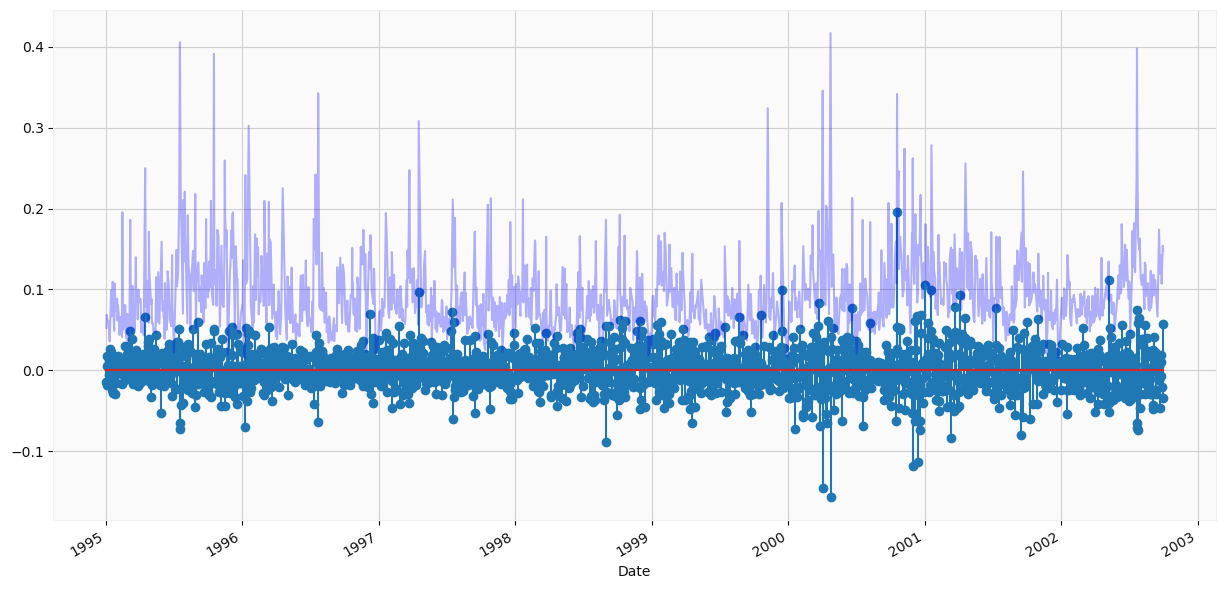

In [81]:
plt.stem(MSFT_df["Date"], MSFT_df["DailyReturn"])
(MSFT_df["Volume"]/1000000000).plot(figsize = (15, 7.5), 
                                 color = "blue", 
                                 alpha = 0.3)

This plot might be slightly confusing but we should pay attention to the spikes. It seems like when there is a spike in volume (the lollypop) there is some sort of spike in price change, although this happens rarely. Looking at this graph there doesn't seem to be much evidence linking volume and daily returns.